In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#loading dataset

def load_csv(file_name):
    return pd.read_csv('../data/' + file_name)

covid_summaries = load_csv('covid_summaries.csv')
del covid_summaries['Unnamed: 0']

df_owid_covid = load_csv('owid_covid_data.csv')
del df_owid_covid['Unnamed: 0']
del df_owid_covid['Unnamed: 0.1']

In [3]:
def get_column(df, column_index): 
    return df.iloc[:,column_index]


def scatter_list(df_corr, fixed_column, figsize, threshold):
    _, num_columns = df_corr.shape
    fig, ax = plt.subplots(1, num_columns, figsize = figsize) 
    columns = df_corr.columns.values
    ax[0].set_ylabel(fixed_column.columns.values[0], fontsize=14)
    
    for i in range(num_columns):
        
        #creating dataframe to plot
        corr_column = get_column(df_corr, i)
        aux = pd.DataFrame()
        aux['corr_column'] = corr_column
        aux['fixed_column'] = fixed_column
        aux.dropna()
        
        #remove outliers
        q = aux['fixed_column'].quantile(threshold)
        aux = aux[aux['fixed_column'] < q]

        #plotting dataframe
        ax[i].scatter(aux['corr_column'], aux['fixed_column'], alpha=0.15, c='blue')
        ax[i].xaxis.set_visible(True) 
        ax[i].yaxis.set_visible(True)
        ax[i].set_xlabel(columns[i], fontsize=14)

    plt.show()
    

def chunk(lst, n):
    return [lst[i:i + n] for i in range(0, len(lst), n)]

In [4]:

fixed_columns_names = ['deaths','confirmed','recovered']
fixed_columns = []

for fixed_col in fixed_columns_names:
    fixed_columns.append(df_owid_covid.filter([fixed_col], axis=1))

for i in fixed_columns_names:
    del df_owid_covid[i]

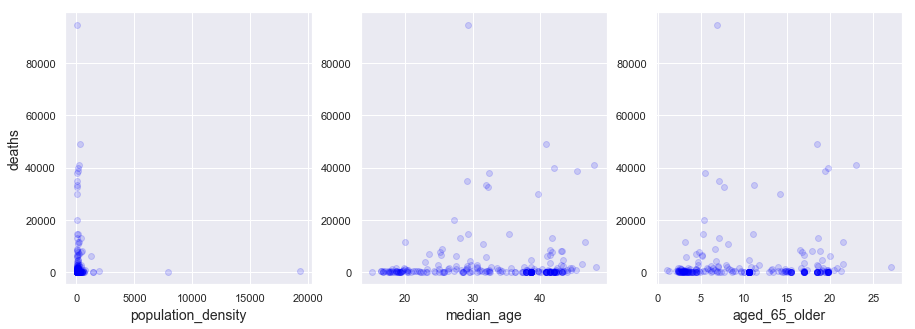

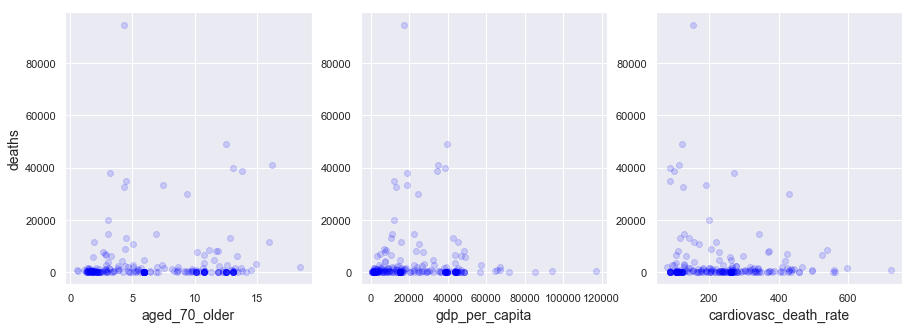

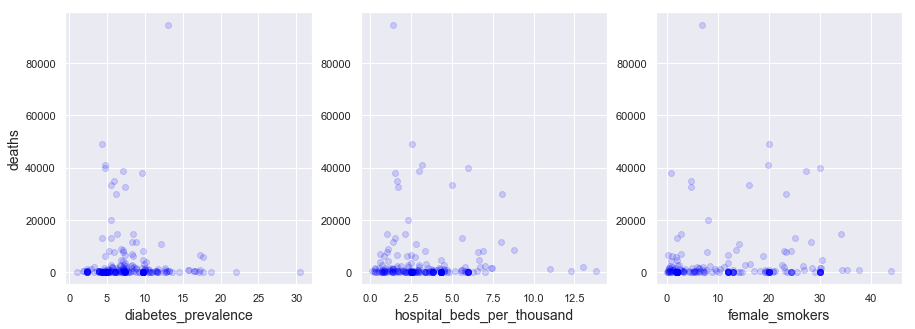

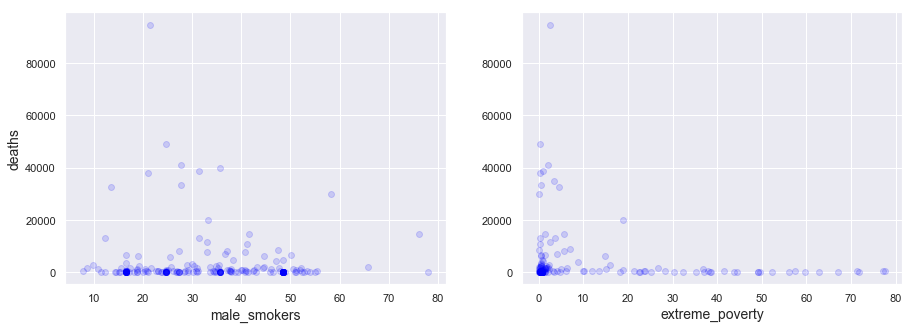

In [6]:
features = [
    u'population_density', u'median_age',
    u'aged_65_older', u'aged_70_older', u'gdp_per_capita',
    u'cardiovasc_death_rate', u'diabetes_prevalence',
    u'hospital_beds_per_thousand',    
    u'female_smokers', u'male_smokers',
    u'extreme_poverty']

df_owid_covid_features = df_owid_covid[features]

w = 5
slices = 3
for sub_arr in chunk(df_owid_covid_features.columns.tolist(), slices):
    aux = df_owid_covid_features.filter(sub_arr)
    scatter_list(aux, fixed_columns[0], figsize=(w * slices, w), threshold=.99)


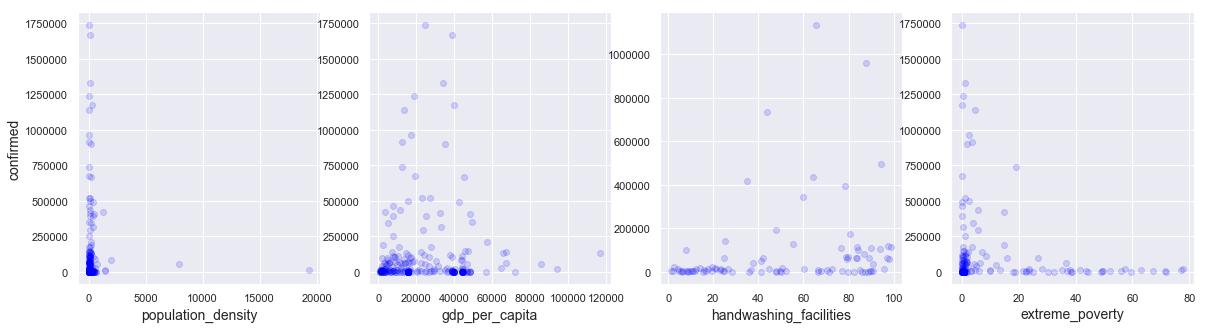

In [7]:
features = ['population_density',
            'gdp_per_capita',
            'handwashing_facilities',
            'extreme_poverty'
           ]
df_owid_covid_features = df_owid_covid[features]

slices = 4
for sub_arr in chunk(df_owid_covid_features.columns.tolist(), slices):
    aux = df_owid_covid_features.filter(sub_arr)
    scatter_list(aux, fixed_columns[1], figsize=(w * slices, w), threshold=.99)



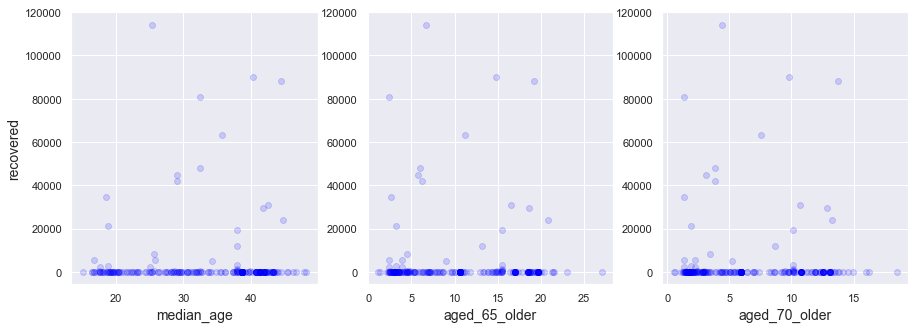

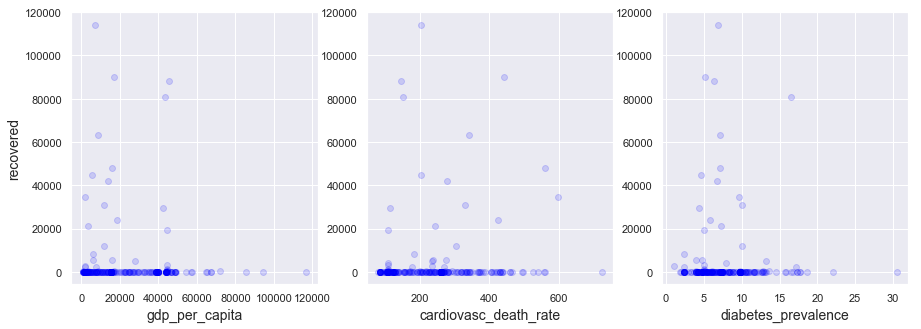

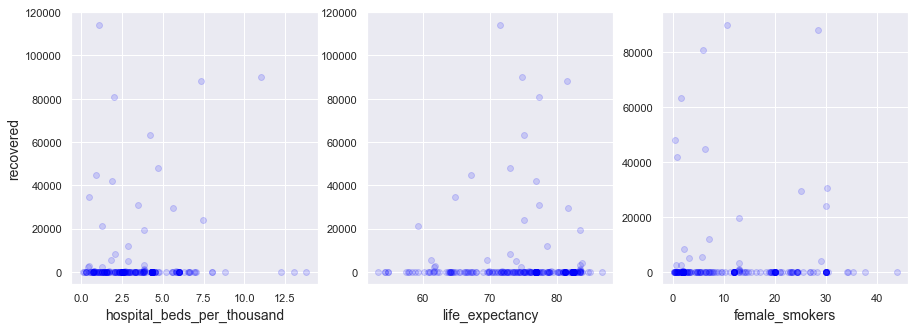

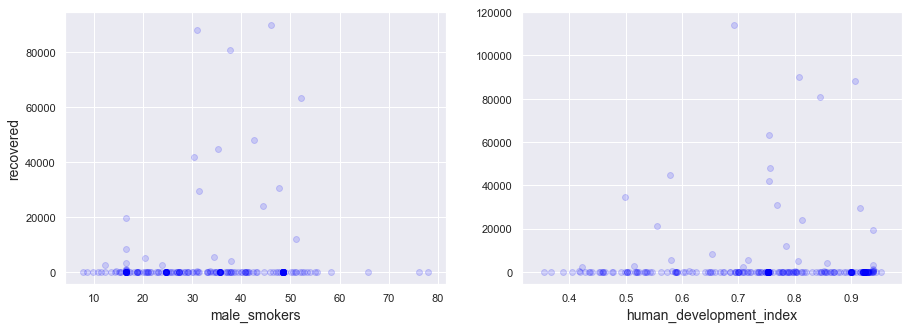

In [8]:
features = [u'median_age', u'aged_65_older', u'aged_70_older', 
            u'gdp_per_capita', u'cardiovasc_death_rate', u'diabetes_prevalence', 
            u'hospital_beds_per_thousand', u'life_expectancy',
            u'female_smokers', u'male_smokers',u'human_development_index']
df_owid_covid_features = df_owid_covid[features]

slices = 3
for sub_arr in chunk(df_owid_covid_features.columns.tolist(), slices):
    aux = df_owid_covid_features.filter(sub_arr)
    scatter_list(aux, fixed_columns[2], figsize=(w * slices, w), threshold=.99)

# heatmap 

In [9]:
def heatmap(df_corr, fixed_column, figsize, threshold):    
    plt.figure(figsize=figsize)
    sns.heatmap(df_corr, annot=True, fmt='.2f')#,cmap='summer', center=0.5);
    

In [10]:
df_owid_covid_ = pd.merge(df_owid_covid, covid_summaries, on='country_code', how='inner')
del df_owid_covid_['deaths_percentage']
del df_owid_covid_['confirmed_percentage']
del df_owid_covid_['recovered_percentage']

for c in df_owid_covid_.columns:
    if c != 'country_code':
        df_owid_covid_[c] = pd.to_numeric(df_owid_covid_[c])
    
df_owid_covid_ = df_owid_covid_.corr()
df_owid_covid_.drop(df_owid_covid_.head(-3).index, inplace=True)

del df_owid_covid_['deaths']
del df_owid_covid_['confirmed']
del df_owid_covid_['recovered']

df_owid_covid_

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,female_smokers,male_smokers,extreme_poverty,human_development_index
deaths,-0.130476,-0.000073,-0.022924,0.072672,0.091950,0.087616,-0.101514,-0.079616,0.142394,-0.083426,0.032010,0.146212,-0.123217,0.024714,0.079447
confirmed,-0.110006,0.005703,-0.031632,0.055529,0.072596,0.074782,-0.074336,-0.062373,0.075968,-0.056200,0.011925,0.135825,-0.102881,0.045955,0.057192
recovered,-0.034562,-0.003393,-0.043513,-0.028837,-0.021837,-0.019380,-0.008816,-0.010429,-0.012680,-0.034035,-0.018946,0.011530,-0.044903,0.009608,-0.011119


ImportError: No module named _multiarray_umath

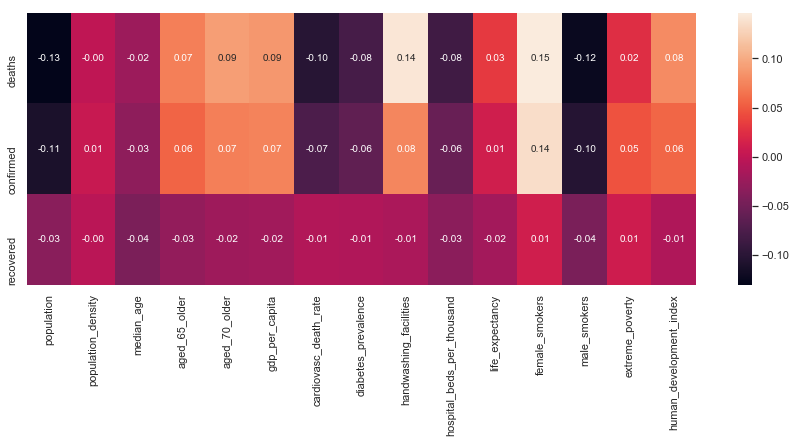

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df_owid_covid_, annot=True, fmt='.2f')